# Meta Data

CIFAR-10 adalah dataset yang sering digunakan dalam bidang visi komputer dan pembelajaran mesin. Berikut adalah gambaran umumnya:

1. **Deskripsi**: CIFAR-10 merupakan singkatan dari Canadian Institute for Advanced Research (CIFAR) 10. Ini adalah subset berlabel dari dataset 80 juta gambar kecil. Dataset ini terdiri dari 60.000 gambar warna berukuran 32x32 piksel dalam 10 kelas, dengan 6.000 gambar per kelas.

2. **Kelas**: Dataset ini berisi gambar yang termasuk dalam 10 kelas berikut:
  - Airplane
  - Automobile
  - Bird
  - Cat
  - Deer
  - Dog
  - Frog
  - Horse
  - Ship
  - Truck

3. **Penggunaan**: CIFAR-10 sering digunakan untuk menguji algoritma dalam bidang pembelajaran mesin dan visi komputer, terutama untuk tugas-tugas seperti klasifikasi gambar, deteksi objek, dan segmentasi gambar. Ini sering digunakan sebagai dataset yang cocok bagi pemula untuk latihan dan pembelajaran teknik pembelajaran mesin karena ukurannya yang kecil dan gambar-gambar yang relatif sederhana.

4. **Format**: Setiap gambar dalam CIFAR-10 adalah gambar RGB 32x32 piksel, yang berarti memiliki tiga saluran warna (merah, hijau, dan biru). Dataset ini dibagi menjadi set pelatihan dengan 50.000 gambar dan set pengujian dengan 10.000 gambar.

5. **Tantangan**: Meskipun sederhana, CIFAR-10 menimbulkan beberapa tantangan bagi algoritma pembelajaran mesin karena ukuran gambar yang kecil, resolusi rendah, dan kemiripan visual antara kelas seperti kucing dan anjing, atau truk dan mobil.

Peneliti dan praktisi sering menggunakan CIFAR-10 untuk mengevaluasi kinerja berbagai model dan algoritma pembelajaran mesin, menjadikannya dataset benchmark standar dalam bidang visi komputer.

- Source: [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

# Import Library

In [1]:
# Installing Visual Keras

!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.0 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

# Visualizing our model (Hidden Input)
import visualkeras

# Load CIFAR-10 dataset

Tensorflow sudah menyediakan dataset menjadi set pelatihan dengan 50.000 gambar dan set pengujian dengan 10.000 gambar.

X_train disini berarti adalah data image nya dan y_train adalah label dari image nya

In [3]:
# Load CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# Split Train set to Validation Set

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=70)

# Let's check and make sure the data

- Training images shape: (45000, 32, 32, 3)
  - Ini berarti terdapat 45,000 gambar pelatihan.
  - Setiap gambar memiliki dimensi 32x32 piksel.
  - Angka 3 menunjukkan bahwa gambar memiliki tiga saluran warna (RGB: merah, hijau, biru).

In [5]:
# Explore the data
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("\nTest images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("\nValidation images shape:", X_valid.shape)
print("Validation labels shape:", y_valid.shape)

Training images shape: (45000, 32, 32, 3)
Training labels shape: (45000, 1)

Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Validation images shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 1)


# Data Preview

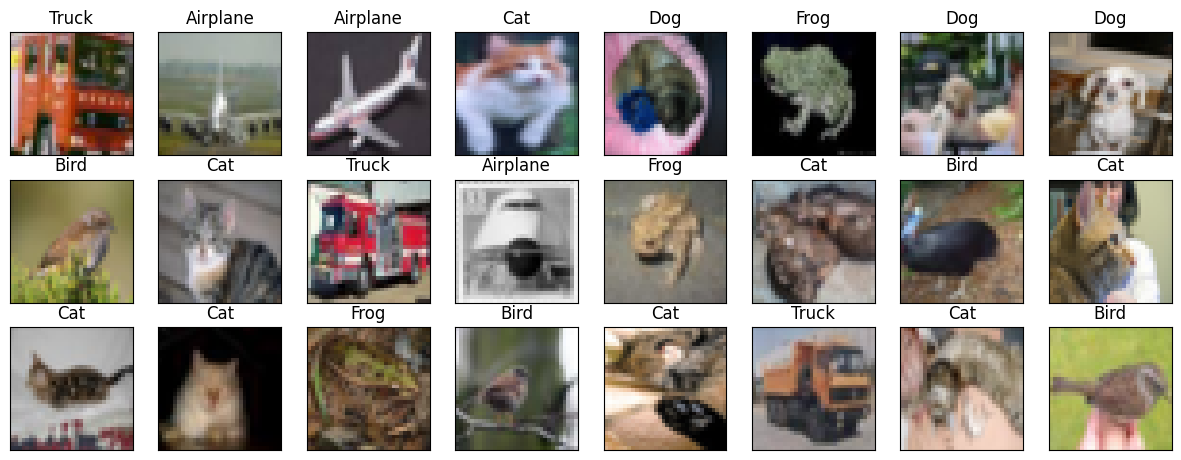

In [6]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(24):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

# Preprocess the data

## Normalisasi Data with Simple Feature Scaling Method

Normalisasi pixel dari data agar menjadi rentang 0 sampai 1 dengan Simple Feature Scaling method. karena nilai pixel disini citra memiliki value dengan rentang 0 sampai 255. di setiap channel (red, green, dan blue) di RGB mode. Semakin mendekati 0 maka semkain gelap (hitam), dan semakin mendekati 255 semakin tinggi intensitas (putih). Normalisasi ini membantu mencapai stabilitas numerik selama pelatihan model dan memastikan bahwa semua fitur berkontribusi sama pada proses pembelajaran. Selain itu, hal ini dapat meningkatkan konvergensi algoritme pengoptimalan dan membuat model kurang sensitif terhadap skala fitur masukan. Namun pada konsep ini, kita harus hati-hati dengan adanya outlier karena outlier dapat mengubah rentang standart dari data

In [7]:
# Preprocess the data (e.g., normalize pixel values)
X_train_SFS = X_train / 255.0
X_test_SFS = X_test / 255.0
X_valid_SFS = X_test / 255.0

## Normalisasi Data with Z-score Method

Normalisasi menggunakan Z-score juga dapat dilakukan terhadap data, Dalam Z-score Scaling, setiap nilai atribut dikurangi dengan rata-rata atribut dan kemudian dibagi dengan standar deviasi atribut. Ini menghasilkan data yang memiliki rata-rata nol dan standar deviasi satu. Teknik ini lebih stabil terhadap outlier karena tidak terpengaruh oleh nilai maksimum atau minimum. Model yang dilatih dengan data yang dinormalisasi dengan teknik ini mungkin lebih sensitif terhadap perbedaan dalam skala atribut.

Dalam Z-score kita juga bisa merepresentasikan dengan mudah nilai datanya, karena jika data bernilai 0 menunjukkan nilai rata-rata dari semua piksel, nilai negatif menunjukkan piksel yang lebih gelap dari rata-rata, dan nilai positif menunjukkan piksel yang lebih terang dari rata-rata.

In [8]:
# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train_Zscore = (X_train-mean)/(std+1e-7)
X_test_Zscore  = (X_test-mean) /(std+1e-7)
X_valid_Zscore = (X_valid-mean)/(std+1e-7)

## One Hot Encoding of Labels

Penggunaan one-hot encoding pada label kelas dalam Convolutional Neural Network (CNN) untuk multi-class classification adalah penting karena beberapa alasan. Pertama, CNN memerlukan representasi kelas dalam bentuk numerik, dan one-hot encoding memberikan cara yang jelas dan langsung untuk mewakili kelas, contohnya jika [0,0,1] berarti Gambar masuk ke kelas nomor 3. Kedua, dengan menggunakan one-hot encoding, output dari CNN memiliki interpretasi yang jelas, memungkinkan kita untuk dengan mudah memahami prediksi model. Terakhir, loss_function yang umum digunakan dalam CNN untuk klasifikasi multi-kelas memerlukan representasi label dalam bentuk one-hot encoding untuk menghitung loss dengan benar.

In [9]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

## Data Augmentation

Data Augmentation biasanya digunakan memperluas ukuran set pelatihan secara artifisial dengan membuat versi gambar yang dimodifikasi dalam set data. Hal ini dapat membantu kinerja model agar dapat meningkatkan generalisasi, sehingga mengurangi overfitting. Namun perlu diingat pilihan teknik augmentasi data sering kali bergantung pada karakteristik spesifik kumpulan data dan masalah yang dihadapi.

Data Augmentation digunakan sebagai langkah preprocessing gambar yang berjalan seiring dengan setiap epoch yang ditetapkan. Transformasi gambar ini akan bervariasi pada setiap epoch, menghasilkan variasi yang berbeda dari gambar aslinya. Perubahan ini dilakukan secara dinamis (On-the-Fly) dan tidak mengubah dataset aslinya.

In [10]:
# Data augmentation
data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    # Randomly flip images horizontally
    horizontal_flip=True,
    # Zoom images in by up to 10%
    zoom_range=0.1,
    # Change brightness by up to 10%
    brightness_range=[0.9,1.1],
    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    # Channel shift intensity
    channel_shift_range=0.1,
    # Way to fill pixels after shifting or rotating. 'nearest' is used to fill empty pixels with the closest pixel values.
    fill_mode='nearest'
)

# Define CNN Model Architecture

## VGG16 Network For Inspiration the Architecture model we used now
![VGG16 Network](https://datagen.tech/wp-content/uploads/2022/11/image2-1.png)


__Arsitektur model__ terinspirasi oleh __jaringan VGG16__, yang menampilkan beberapa __Convolution Layer__ diikuti oleh lapisan __Max_Pooling__ dan lapisan __Dropout__, serta lapisan yang terhubung sepenuhnya untuk __klasifikasi__. Ini dimulai dengan memasangkan __lapisan Conv2D__ dengan __32 filter__ ukuran __3x3__, diikuti oleh __Batch Normalization__ untuk __regularisasi__ dan mempercepat pelatihan serta membantu mencegah __overfitting__. Lapisan __MaxPooling2D__ mengurangi dimensi spasial, diikuti oleh lapisan __Dropout__ untuk mencegah overfitting. Pola ini berulang dengan meningkatnya __filter (32, 64, 128, 256)__ dan tingkat __dropout (0,2 hingga 0,5)__. Setelah __lapisan konvolusional dan Pooling__, lapisan Ratakan mengubah keluaran menjadi __vektor 1D__, diikuti oleh __Dense (or fully connected) layer__ dengan 10 unit untuk klasifikasi menggunakan __aktivasi softmax__. Teknik regularisasi seperti regularisasi L2, Dropout, dan __Batch Normalization__ digunakan untuk efisiensi dan kesederhanaan, dengan fokus pada pembelajaran fitur hierarki dari gambar __CIFAR-10__ sekaligus mencegah overfitting. Namun meskipun terinspirasi oleh __VGG16__, model ini tetap sederhana dan tidak menggabungkan fitur-fitur canggih dari arsitektur terkini, melainkan berfokus pada __efisiensi dan kesederhanaan.__

In [11]:
# Initialize a sequential model
model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=X_train.shape[1:]))
# Add batch normalization layer
model.add(BatchNormalization())

# Add the second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with 0.2 dropout rate
model.add(Dropout(rate=0.2))

# Add the third and fourth convolutional layers with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add the fifth and sixth convolutional layers with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the third max pooling layer and increase dropout rate to 0.4
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

# Add the seventh and eighth convolutional layers with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

# Add the fourth max pooling layer and increase dropout rate to 0.5
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
model.add(Dense(10, activation='softmax'))

# Visualize the CNN Architecture Model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

Model kita hanya terdiri dari 1.186.346 parameter, 1.184.426 di antaranya dapat dilatih. Ini adalah model yang relatif kompak, terutama jika dibandingkan dengan arsitektur canggih yang sering kali memiliki puluhan atau bahkan ratusan juta parameter.

Parameter-parameter yang "trainable" dalam sebuah model jaringan saraf adalah parameter-parameter yang disesuaikan selama proses pelatihan untuk meminimalkan fungsi kerugian dan meningkatkan kinerja model. Ini termasuk bobot (weights) dari lapisan-lapisan Conv2D dan Dense, bias, parameter-parameter BatchNormalization yang diatur sebagai trainable, dan parameter-parameter regularisasi. Di sisi lain, parameter-parameter yang "tidak trainable" biasanya terkait dengan lapisan-lapisan khusus seperti lapisan BatchNormalization yang mungkin memiliki parameter "scale" dan "center" yang tidak diatur sebagai trainable untuk tujuan tertentu, atau parameter-parameter yang disetel statis seperti dalam beberapa konfigurasi praproses data atau lapisan-lapisan khusus yang tidak memerlukan penyesuaian selama pelatihan.

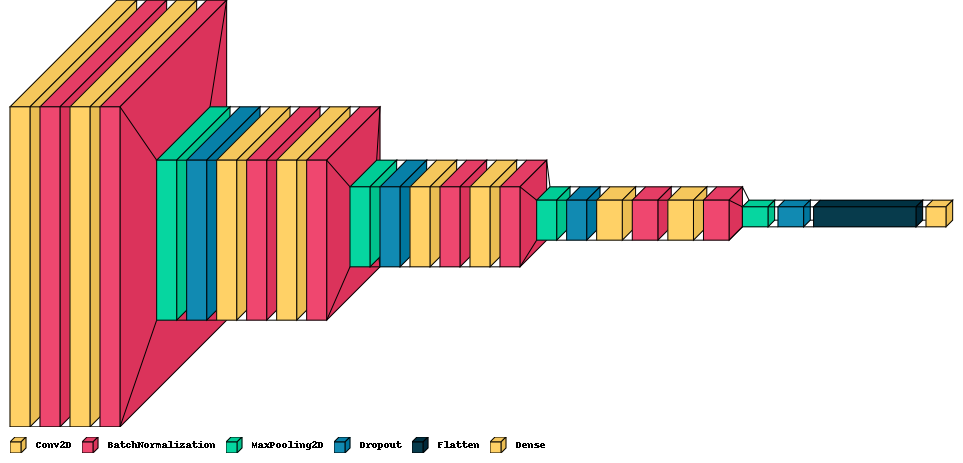

In [13]:
visualkeras.layered_view(model, scale_xy=10, legend=True)

# Training CNN Model

Sekarang adalah proses pelatihan model jaringan saraf. Proses pelatihan ini menggunakan ukuran batch sebesar 64 dan akan berjalan maksimal selama 250 epoch atau hingga kriteria EarlyStopping terpenuhi. Selama pelatihan, kinerja model dievaluasi pada data validasi setelah setiap epoch. Untuk mengoptimalkan proses pelatihan, saya telah menyertakan dua callback function:

1. Fungsi panggilan ReduceLROnPlateau menyesuaikan learning rate secara dinamis, dengan mengurangi separuhnya (faktor=0.5) ketika loss_validation tidak mengalami perbaikan selama 10 epoch berturut-turut. Penyesuaian ini membantu model untuk mendekati nilai minimum global dari loss_function saat kemajuan terhenti, yang dapat meningkatkan konvergensi pelatihan.

2. Fungsi panggilan EarlyStopping memantau loss_validation dan menghentikan proses pelatihan jika tidak ada peningkatan selama jumlah epoch yang telah ditentukan. Hal ini mencegah penggunaan sumber daya dan waktu yang tidak perlu. Selain itu, fungsi panggilan ini mengembalikan bobot terbaik yang diperoleh selama pelatihan, sehingga kami dapat mempertahankan konfigurasi model yang optimal.

In [14]:
# Set the batch size for the training
batch_size = 64

# Set the maximum number of epochs for the training
epochs = 250

# Define the optimizer (Adam)
optimizer = Adam(learning_rate=0.0005)

# Compile the model with the defined optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Add EarlyStopping callback
# Here, training will be stopped if no improvement in validation loss is observed for 40 epochs.
# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

# Fit the model on the training data, using the defined batch size and number of epochs
# The validation data is used to evaluate the model's performance during training
# The callbacks implemented are learning rate reduction when a plateau is reached in validation loss and
# stopping training early if no improvement is observed
model.fit(data_generator.flow(X_train_Zscore, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(X_valid_Zscore, y_valid),
          callbacks=[reduce_lr, early_stopping],
          verbose=2)

Epoch 1/250
704/704 - 65s - loss: 2.3528 - accuracy: 0.3351 - val_loss: 2.0318 - val_accuracy: 0.3754 - lr: 5.0000e-04 - 65s/epoch - 92ms/step
Epoch 2/250
704/704 - 50s - loss: 1.6966 - accuracy: 0.4672 - val_loss: 1.8154 - val_accuracy: 0.5286 - lr: 5.0000e-04 - 50s/epoch - 71ms/step
Epoch 3/250
704/704 - 49s - loss: 1.4673 - accuracy: 0.5321 - val_loss: 1.3484 - val_accuracy: 0.5740 - lr: 5.0000e-04 - 49s/epoch - 69ms/step
Epoch 4/250
704/704 - 48s - loss: 1.3158 - accuracy: 0.5774 - val_loss: 1.0684 - val_accuracy: 0.6624 - lr: 5.0000e-04 - 48s/epoch - 68ms/step
Epoch 5/250
704/704 - 49s - loss: 1.1947 - accuracy: 0.6203 - val_loss: 1.0903 - val_accuracy: 0.6646 - lr: 5.0000e-04 - 49s/epoch - 69ms/step
Epoch 6/250
704/704 - 49s - loss: 1.1249 - accuracy: 0.6450 - val_loss: 1.0919 - val_accuracy: 0.6634 - lr: 5.0000e-04 - 49s/epoch - 70ms/step
Epoch 7/250
704/704 - 50s - loss: 1.0550 - accuracy: 0.6744 - val_loss: 0.9293 - val_accuracy: 0.7180 - lr: 5.0000e-04 - 50s/epoch - 71ms/step

In [25]:
#  3.472 jam running model - 93% Akurasi Untuk Data Latih

# Save the model

In [16]:
from keras.models import load_model

# Simpan model
model.save('/content/drive/MyDrive/Colab Notebooks/1. Bisa Ai/Natural Language Preprocessing/cifar-10 classification models.h5')

# Memuat model
model = load_model('/content/drive/MyDrive/Colab Notebooks/1. Bisa Ai/Natural Language Preprocessing/cifar-10 classification models.h5')

# Evaluating the Optimal Model on Test Data

Karena kita telah menetapkan recovery_best_weights=True di EarlyStopping, setelah pelatihan, model itu sendiri akan memiliki bobot terbaik. Setelah ini, saya akan menggunakan model ini untuk mengevaluasi kinerjanya pada data pengujian, menghitung akurasi dan kerugian pengujian

In [24]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test_Zscore, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.4266 - accuracy: 0.9070

Test Accuracy: 0.9070000052452087
Test Loss:     0.4266330599784851


Dengan akurasi pengujian sekitar ***90%***, model ini menunjukkan kinerja yang sangat baik pada data uji yang tidak dikenal sebelumnya. Meskipun memiliki jumlah parameter yang relatif sedikit, hanya sekitar 1,2 juta, model ini berhasil mencapai akurasi yang tinggi. Hal ini menarik karena banyak arsitektur yang lebih kompleks menggunakan jutaan bahkan puluhan juta parameter untuk mencapai hasil serupa atau hanya sedikit lebih baik. Fakta bahwa loss dan akurasi pengujian berada dalam jarak yang dekat dengan model pelatihan menunjukkan bahwa model ini tidak hanya menghafal data pelatihan, tetapi juga memahami pola dengan baik dan mampu menggeneralisasi dari data pelatihan ke data yang belum pernah dilihat sebelumnya.

# Performance on an Out-of-Dataset Image

In [52]:
import urllib.request
import cv2

# Fetch the raw image from GitHub
url = "https://www.akc.org/wp-content/uploads/2017/11/GettyImages-187066830.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

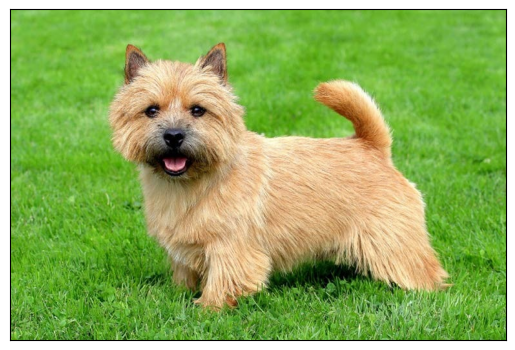

In [53]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [54]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

In [55]:
# Calculate the mean and standard deviation of the training images
mean = np.mean(image)
std  = np.std(image)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
image_Zscore = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image_Zscore = image_Zscore.reshape((1, 32, 32, 3))

In [56]:
prediction = model.predict(image_Zscore)

1/1 [==============================] - 0s 62ms/step


In [57]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  Dog
